In [21]:
import pandas as pd
weather = pd.read_csv("../07-Prediction/data/ACC - Rain -Albert Park Acc rainfall_20220818-20230818-5mins.csv")
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105131 entries, 0 to 105130
Data columns (total 8 columns):
 #   Column                                          Non-Null Count   Dtype  
---  ------                                          --------------   -----  
 0   Timestamp                                       105131 non-null  object 
 1   UTC Offset                                      105131 non-null  int64  
 2   Multiple Gauge Rainfall Recency Alarm (on/off)  60608 non-null   float64
 3   Quality                                         105131 non-null  object 
 4   Rainfall (mm)                                   2851 non-null    float64
 5   Quality.1                                       105131 non-null  object 
 6   Rainfall (Accumulated) (mm)                     105131 non-null  float64
 7   Quality.2                                       105131 non-null  object 
dtypes: float64(3), int64(1), object(4)
memory usage: 6.4+ MB


In [22]:
pd.to_datetime(weather["Timestamp"])

0        2022-08-18 14:20:00
1        2022-08-18 14:25:00
2        2022-08-18 14:30:00
3        2022-08-18 14:35:00
4        2022-08-18 14:40:00
                 ...        
105126   2023-08-18 14:00:00
105127   2023-08-18 14:05:00
105128   2023-08-18 14:10:00
105129   2023-08-18 14:15:00
105130   2023-08-18 14:20:00
Name: Timestamp, Length: 105131, dtype: datetime64[ns]

In [23]:
weather["Timestamp"] = pd.to_datetime(weather["Timestamp"])

In [24]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105131 entries, 0 to 105130
Data columns (total 8 columns):
 #   Column                                          Non-Null Count   Dtype         
---  ------                                          --------------   -----         
 0   Timestamp                                       105131 non-null  datetime64[ns]
 1   UTC Offset                                      105131 non-null  int64         
 2   Multiple Gauge Rainfall Recency Alarm (on/off)  60608 non-null   float64       
 3   Quality                                         105131 non-null  object        
 4   Rainfall (mm)                                   2851 non-null    float64       
 5   Quality.1                                       105131 non-null  object        
 6   Rainfall (Accumulated) (mm)                     105131 non-null  float64       
 7   Quality.2                                       105131 non-null  object        
dtypes: datetime64[ns](1), float64(3), i

In [25]:
weather["Timestamp"].dt.day


0         18
1         18
2         18
3         18
4         18
          ..
105126    18
105127    18
105128    18
105129    18
105130    18
Name: Timestamp, Length: 105131, dtype: int64

<Axes: >

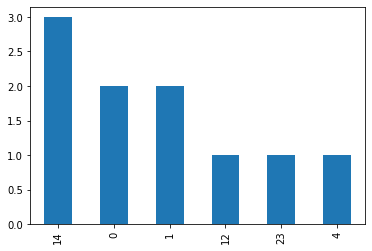

In [26]:
most_rain = weather.sort_values("Rainfall (mm)").head(10)
most_rain
most_rain["Timestamp"].dt.hour.value_counts().plot(kind="bar")

## Import dataset and parse the "date" column

In [27]:
import pandas as pd
housesales = pd.read_csv("data/kc_house_data.csv", parse_dates=["date"])
housesales.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

## Calculate how many days the dataset spans

In [28]:
timespan = housesales["date"].max() - housesales["date"].min()
timespan.days

390

## Find the date that had the most house sales
## Find all the homes sold on that date

In [29]:
housesales["date"].value_counts()
# other option
top_sale = housesales["date"].mode()[0]
housesales[housesales["date"] == top_sale]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
117,4060000240,2014-06-23,205425.0,2,1.00,880,6780,1.0,0,0,...,6,880,0,1945,0,98178,47.5009,-122.248,1190,6780
397,5175800060,2014-06-23,365000.0,4,2.00,1940,25600,1.0,0,0,...,8,1940,0,1962,0,98006,47.5722,-122.129,2000,10071
470,2172000075,2014-06-23,290900.0,2,2.00,1610,17600,2.0,0,0,...,6,1610,0,1930,1983,98178,47.4855,-122.266,1310,12950
621,3010300240,2014-06-23,577000.0,3,2.50,2060,5750,1.0,0,0,...,7,1330,730,1976,0,98116,47.5671,-122.391,1920,5750
676,7846700310,2014-06-23,280000.0,2,1.00,1010,3000,1.0,0,0,...,7,1010,0,1925,0,98045,47.4965,-121.785,1150,7000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21230,3629990280,2014-06-23,497000.0,3,2.25,1630,3817,2.0,0,0,...,7,1630,0,2005,0,98029,47.5485,-121.999,1630,3348
21479,6181500120,2014-06-23,312891.0,5,3.00,2300,8214,2.0,0,0,...,8,2300,0,2013,0,98001,47.3052,-122.276,2594,4950
21529,2487200490,2014-06-23,670000.0,3,2.50,3310,5300,2.0,0,2,...,8,2440,870,2008,0,98136,47.5178,-122.389,2140,7500
21578,567000385,2014-06-23,362500.0,2,1.50,940,1768,2.0,0,0,...,7,940,0,2009,0,98144,47.5925,-122.295,1130,1159


# Create a pie chart showing the years that home sales took place in 2014 and 2015

<Axes: ylabel='date'>

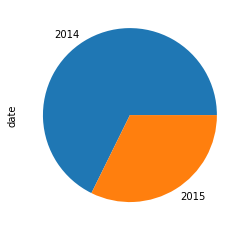

In [30]:
housesales["date"].dt.year.value_counts().plot(kind="pie")

## Find all the homes sold in 2014, sorted from earliest to latest

In [31]:
# sales = housesales["date"].dt.year == 2014
# housesales[sales].sort_values("date")
housesales[housesales["date"].dt.year == 2014].sort_values("date")

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
11907,3221059036,2014-05-02,400000.0,4,2.50,3630,42884,1.5,0,0,...,9,2300,1330,1979,0,98092,47.2617,-122.190,2830,80148
20559,3438501320,2014-05-02,295000.0,2,2.50,1630,1368,2.0,0,0,...,7,1280,350,2009,0,98106,47.5489,-122.363,1590,2306
17038,2326059099,2014-05-02,838000.0,4,2.50,3310,42998,2.0,0,0,...,9,3310,0,2001,0,98052,47.7232,-122.131,3350,42847
15921,7831800460,2014-05-02,235000.0,2,1.00,1210,9400,1.0,0,0,...,6,1210,0,1949,0,98106,47.5342,-122.360,1580,6026
11891,7305300695,2014-05-02,625000.0,4,2.50,2820,8408,2.0,0,0,...,9,2820,0,2014,0,98155,47.7538,-122.325,1300,8408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1692,7701990700,2014-12-31,825000.0,4,2.50,3210,18901,2.0,0,0,...,10,3210,0,1993,0,98077,47.7090,-122.073,3330,18901
8393,2493200215,2014-12-31,582000.0,3,1.75,1820,3140,2.0,0,0,...,8,1820,0,1949,1990,98136,47.5271,-122.384,2030,5499
18462,7345200650,2014-12-31,219200.0,3,2.00,1680,7000,1.5,0,0,...,7,1680,0,1968,0,98002,47.2775,-122.203,1540,7480
9850,8861000060,2014-12-31,875000.0,3,1.00,1160,10732,1.0,0,0,...,7,1160,0,1953,0,98004,47.6391,-122.205,2390,13656


## number of sales that took place in each month of the year. Which month had the most

In [32]:
# housesales["date"].dt.month.value_counts()
housesales["date"].dt.month.mode()

0    5
Name: date, dtype: int64

## Find the homes sold between May 1st 2014 and May 1st 2015
- Create a bar plot showing the total number of sales per month in that period
- THe x axis shoulb be in calendar order(1-12)

<Axes: >

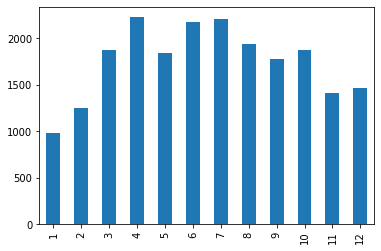

In [33]:
oneyearsales= housesales[housesales["date"].between("2014-05-01", "2015-05-01")]
oneyearsales["date"].dt.month.value_counts().sort_index().plot(kind="bar")

## Count up the number of homesales by day of the week


In [34]:
housesales["date"].dt.dayofweek.value_counts()

1    4715
2    4603
0    4099
3    3994
4    3685
5     287
6     230
Name: date, dtype: int64

## Create a line plot showing the total number of sales by week of the year

<Axes: >

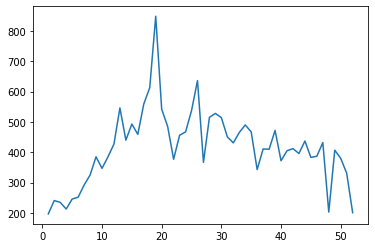

In [35]:
housesales["date"].dt.isocalendar().week.value_counts().sort_index().plot()

## Create a bar plot showing the total number of sales that took place in Dec, Jan, Feb

<Axes: >

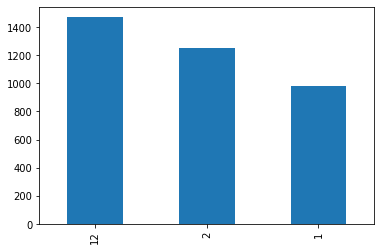

In [36]:
df = housesales[housesales["date"].dt.month.isin([12,1,2])]
df["date"].dt.month.value_counts().plot(kind="bar")

## Work with the homes sold between May 1st 2014 and May 1st 2015
- Within that year, find the waterfront homes that were sold
- WHich quater of that year had the most waterfront home sales?
- Create a bbar plot shwoing the number of waterfront hom sales per quater

In [40]:
df = housesales[housesales["date"].between("2014-05-01", "2015-05-01")]
waterfront = df[df["waterfront"] == 1]
waterfront["date"].dt.quarter.value_counts()

2    48
4    43
3    42
1    27
Name: date, dtype: int64

<Axes: >

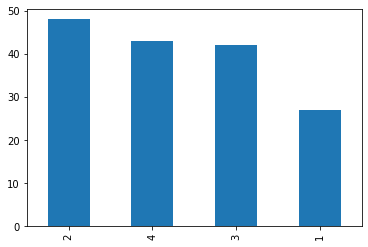

In [41]:
waterfront["date"].dt.quarter.value_counts().plot(kind="bar")

<Axes: >

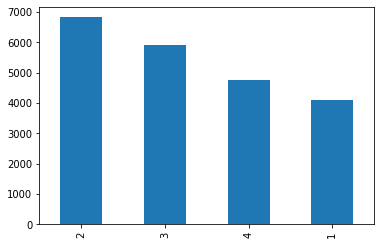

In [42]:
housesales["date"].dt.quarter.value_counts().plot(kind="bar")